# Collecting tweets related to stock market

#### Objectives:

1. Collecting tweets for one week from twitter based on stock market keywords like #Altcoin, #Bitcoin, etc.
2. Saving the collected tweets into csv file based on each keyword.
3. Remove duplication, punctuations, numbers in tweets, and words with length less than 2.
4. Visualizing the data to present the daily number of tweets for each keyword as well as the daily number of users.

In [1]:
# Importing Libraries
import tweepy as tw

import json
import glob

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

twitter_auth() is a user-defined function that has the authentication credentials to establish connection between twitter and python using the tweepy library.

In [2]:
def twitter_auth():

    cred = {"consumer_key": "3hy8Uqd0FiHPRBgJhN5AVndDn",
            "consumer_secret": "oURr7qXPPs3lWzrHnmCLQ6DyovfnhpxfNv8rnR07Okqarrwrf2",
            "access_token": "1438446569867464707-qw5aQnbiv8OYnVtv3C6fPerwoRKlFu",
            "access_secret": "YEkQWmEeXa4WVnJwh4xcg281F3jLLyUYtMmDbceHZR6ey"}

    # Create authentication object.
    auth = tw.OAuthHandler(cred['consumer_key'], cred['consumer_secret'])
    
    # Setting the access token to auth object.
    auth.set_access_token(cred['access_token'], cred['access_secret'])
    
    return auth

ticker_symbols, start_date and end_date are the arguments passed in the user-defined function get_tweets_csv()

In [3]:
# List of keywords to collect the tweets.
ticker_symbols = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'APPL', 'GOOG', 'YHOO']

# Starting date of tweet collection.
start_date = (datetime.datetime.now() - datetime.timedelta(days=7)).strftime('%Y-%m-%d')

# Ending date of tweet collection.
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

User-defined function get_tweets_csv() will collect the tweets related to the keywords in 'ticker_symbols' for one week and will save the tweets for each ticker_symbol as separate csv files based on the 'ticker_symbol'.

In [4]:
def get_tweets_csv(ticker_symbols, start_date, end_date):
    
    # Create API object to get tweets using the auth object
    api = tw.API(twitter_auth(), wait_on_rate_limit=True)

    for ticker in ticker_symbols:
        
        # Collects tweets for a week for each ticker.
        tweets = tw.Cursor(api.search,
                  q=ticker,
                  lang="en",
                  since = start_date,
                  until = end_date,
                  tweet_mode = 'extended',
                  count = 500000).items(500000)

        tweets_stock = []

        for tweet in tweets:
            
            # Create a dictionary to combines all the tweets of each ticker.
            tweets_stock_dict = {"tweet id": tweet.id,
                                 "time of tweet" : tweet.created_at,
                                 "user id": tweet.user.screen_name,
                                 "text" : tweet.full_text}
            
            tweets_stock.append(tweets_stock_dict)
        
        # Converting the 'tweets_stock' to a dataframe.
        tweets_stock_df = pd.DataFrame(tweets_stock)
        
        # Saving the dataframe as csv files for each ticker.
        tweets_stock_df.to_csv(ticker + '.csv', index=False)
            
        
    return tweets_stock_df

In [5]:
# Function call
tweets_stock = get_tweets_csv(ticker_symbols, start_date, end_date)

In [6]:
# Create a dataframe to combine the individual ticker csv files as a single dataframe.

# Create an empty dataframe to combine the data.
twitter_stock_combined = pd.DataFrame()

# Looping through each csv file in the folder.
for infile in glob.glob("*.csv"):
    
    # Read the individual csv files and store them in the dataframe.
    twitter_stock_df = pd.read_csv(infile)
    
    # Add a new column named 'ticker' that indicates the stock market keywords.
    twitter_stock_df['ticker'] = infile.replace('.csv', "")
    
    # Combining all the individual csv files along with their ticker names.
    twitter_stock_combined = twitter_stock_combined.append(twitter_stock_df, ignore_index=True)

In [7]:
# Check dimension of the combined tweets.
twitter_stock_combined.shape

(2161018, 5)

We have collected a total of 2161018 tweets from twitter related to the stock market tickers for twitter analysis.

## 3. Cleaning data

Cleaning data: remove duplication, remove punctuations, remove numbers in tweets, and remove words with length less than 2.

In [8]:
# Remove duplicates.
twitter_stock_df = twitter_stock_combined.drop_duplicates()

# Remove punctuations, remove numbers in tweets, and remove words with length less than 2.
twitter_stock_df["text_cleaned"] = twitter_stock_df['text'].str.replace('[^\w\s]','')\
                                    .replace('\d+', '')\
                                        .str.replace(r'\b(\w{1,3})\b', '')

In [9]:
# Changing object type column to datetime and creating new column with date.
twitter_stock_df['tweet_date'] = pd.to_datetime(twitter_stock_df['time of tweet']).dt.date

# Re-ordering columns.
twitter_stock_df = twitter_stock_df[["tweet id", "time of tweet", "tweet_date", "user id", \
                                                     "text", "text_cleaned", "ticker"]]

# Replace space with underscore in column names pandas.
twitter_stock_df.columns = twitter_stock_df.columns.str.replace(' ','_')

In [10]:
# Check the top 5 rows of the cleansed data.
twitter_stock_df.head()

,tweet_id,time_of_tweet,tweet_date,user_id,text,text_cleaned,ticker
0,1.450250e+18,2021-10-18 23:59:51,2021-10-18,jxxaemcityx,RT @CAMPFIRET0KEN: #CAMPFIRETOKEN \n✔ Instant ...,CAMPFIRET0KEN CAMPFIRETOKEN \n Instant upon...,Altcoin
1,1.450250e+18,2021-10-18 23:59:49,2021-10-18,masterrumbo,RT @CAMPFIRET0KEN: #CAMPFIRETOKEN \n✔ Instant ...,CAMPFIRET0KEN CAMPFIRETOKEN \n Instant upon...,Altcoin
2,1.450250e+18,2021-10-18 23:59:48,2021-10-18,dignityong,RT @ElenaCryptoBaby: @CAMPFIRET0KEN \n#CAMPFIR...,ElenaCryptoBaby CAMPFIRET0KEN \nCAMPFIRETOKEN...,Altcoin
3,1.450250e+18,2021-10-18 23:59:46,2021-10-18,joyceewins,RT @ElenaCryptoBaby: @CAMPFIRET0KEN \n#CAMPFIR...,ElenaCryptoBaby CAMPFIRET0KEN \nCAMPFIRETOKEN...,Altcoin
4,1.450250e+18,2021-10-18 23:59:44,2021-10-18,nomscattseun,RT @ElenaCryptoBaby: @CAMPFIRET0KEN \n#CAMPFIR...,ElenaCryptoBaby CAMPFIRET0KEN \nCAMPFIRETOKEN...,Altcoin


## 4. Visualizing data

Need to present the daily number of tweets for each keyword as well as the daily number of users.

In [11]:
# Grouping the tweets data based on 'ticker' and 'tweet_date' to get the number of tweets for each day.
tweet_date_grp = pd.DataFrame(twitter_stock_df.groupby(['ticker', 'tweet_date'])\
                                          .size().reset_index(name ='tweet_count'))

# Grouping the tweets data based on 'ticker', 'tweet_date' and user_id to get the daily number of users.
tweet_date_user_grp = pd.DataFrame(twitter_stock_df.groupby(['ticker', 'tweet_date'])['user_id']\
                                                           .nunique().reset_index(name ='user_n'))

# Merge the 'tweet_date_grp' and 'tweet_date_user_grp' dataframes.
ticker_grp = pd.merge(tweet_date_grp, tweet_date_user_grp)

In [12]:
# Print the dataframe for daily tweets and number of users for each ticker.
ticker_grp

,ticker,tweet_date,tweet_count,user_n
0,APPL,2021-10-13,310,272
1,APPL,2021-10-14,303,239
2,APPL,2021-10-15,274,217
3,APPL,2021-10-16,169,104
4,APPL,2021-10-17,127,96
5,APPL,2021-10-18,273,213
6,APPL,2021-10-19,285,213
7,Altcoin,2021-10-13,9862,6395
8,Altcoin,2021-10-14,17290,9817
9,Altcoin,2021-10-15,14126,9401


### Visualizing the number of tweets and number of users for each day.

<IPython.core.display.Javascript object>


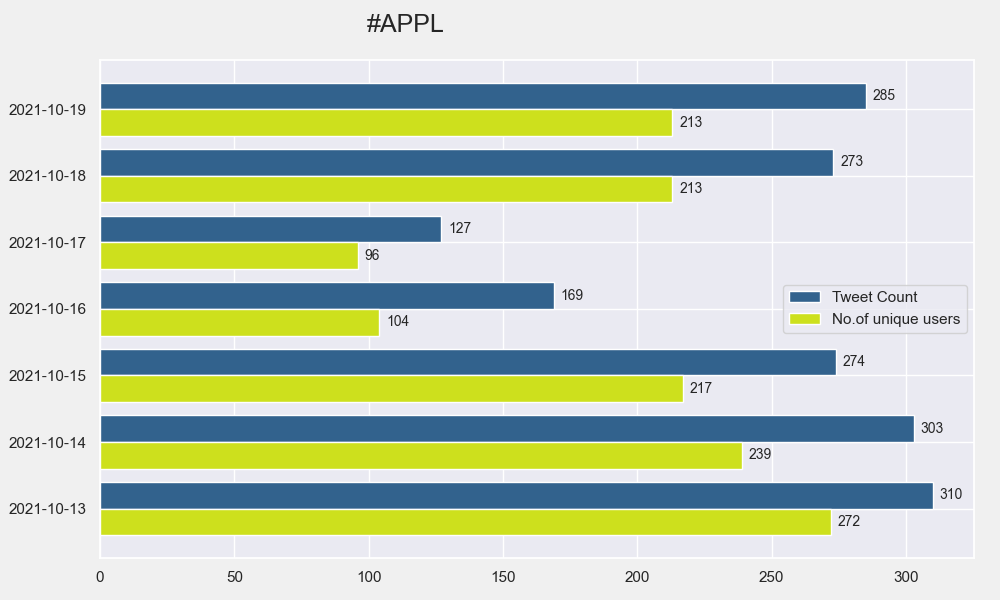

<IPython.core.display.Javascript object>


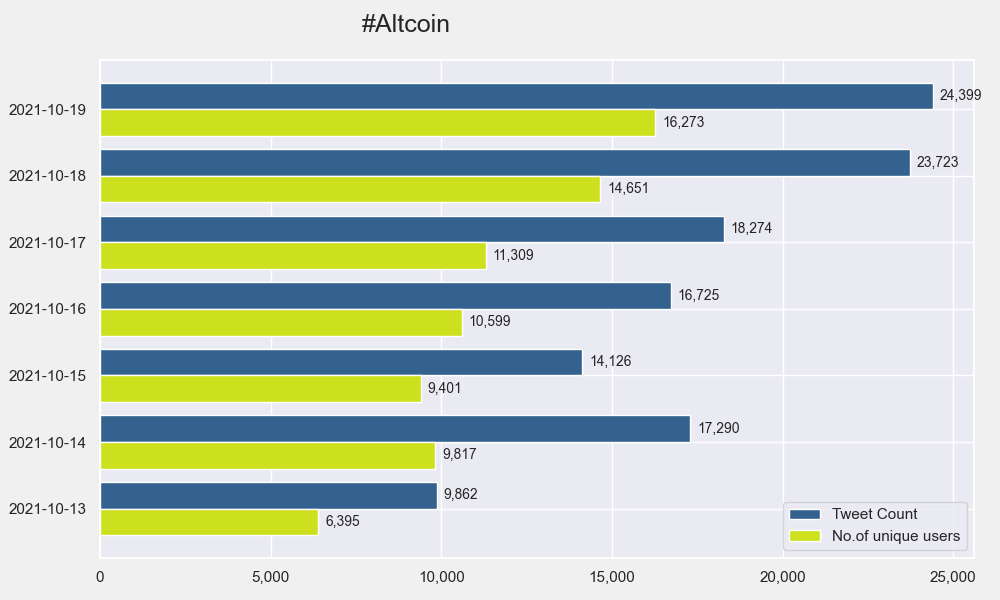

<IPython.core.display.Javascript object>


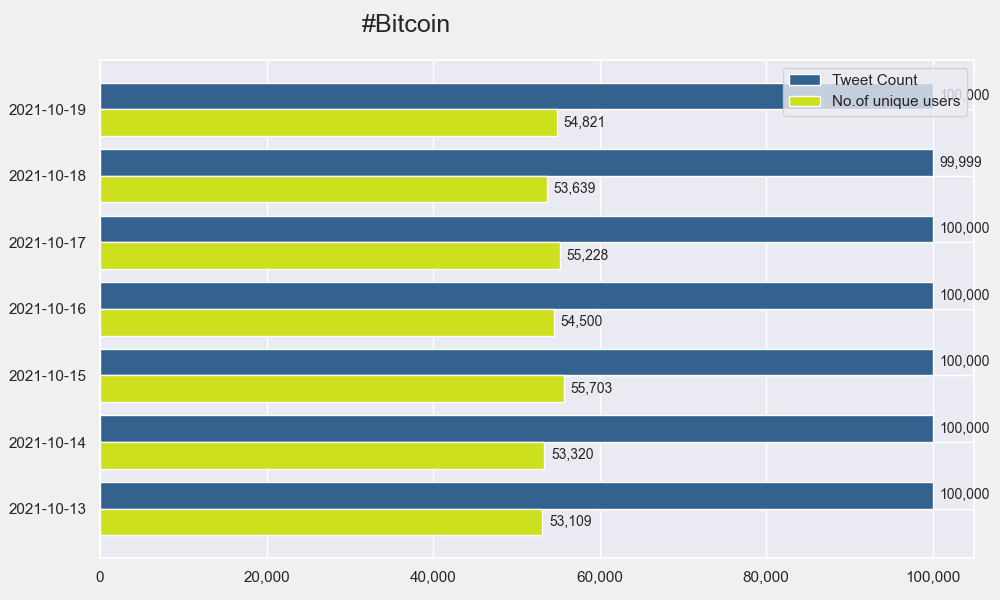

<IPython.core.display.Javascript object>


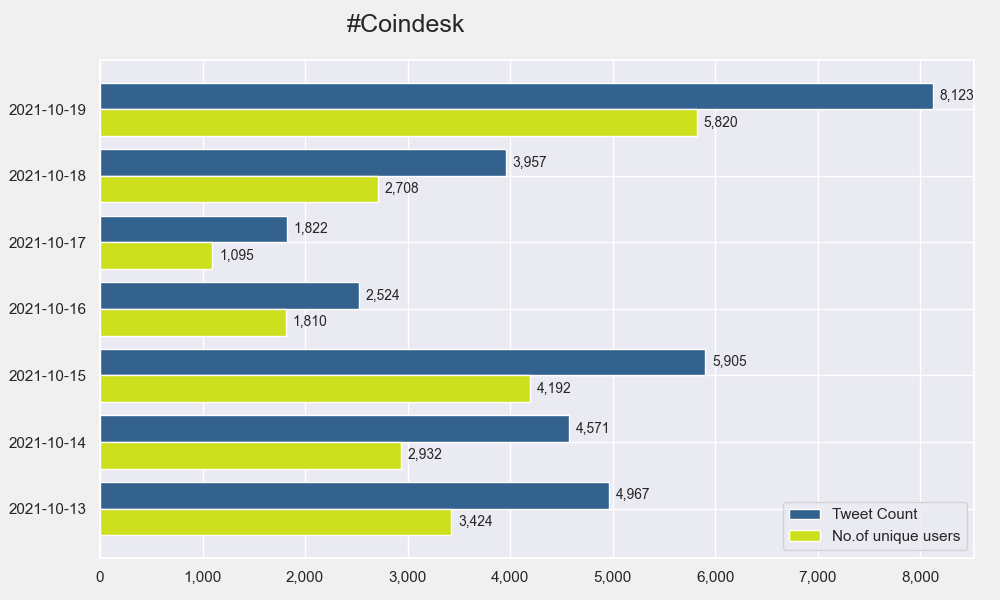

<IPython.core.display.Javascript object>


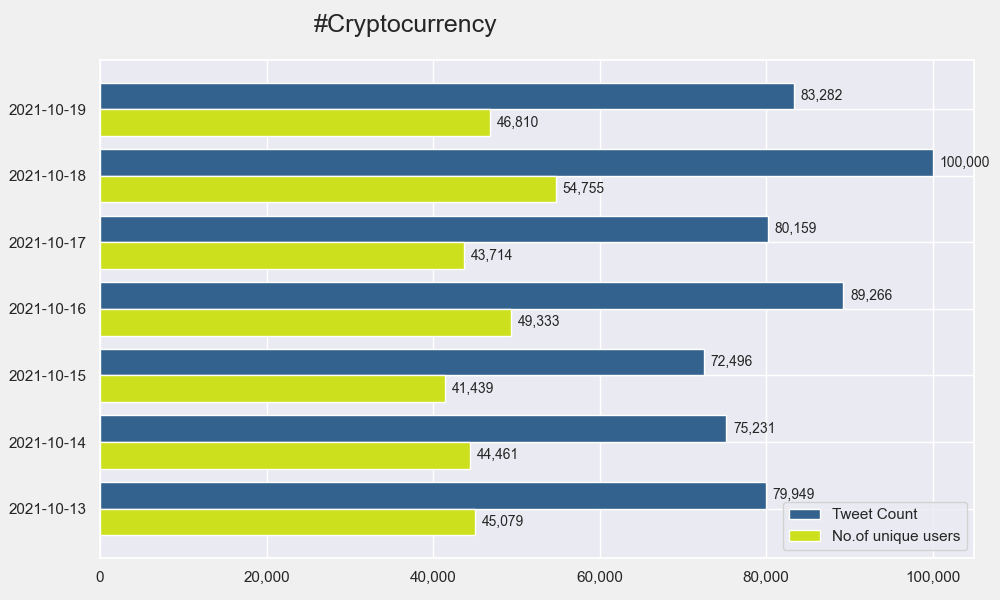

<IPython.core.display.Javascript object>


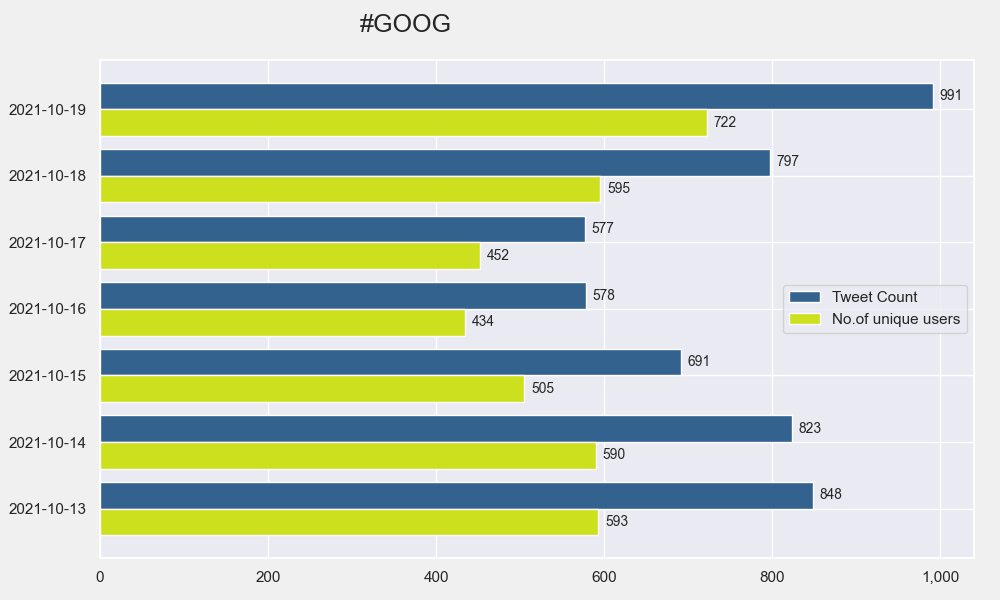

<IPython.core.display.Javascript object>


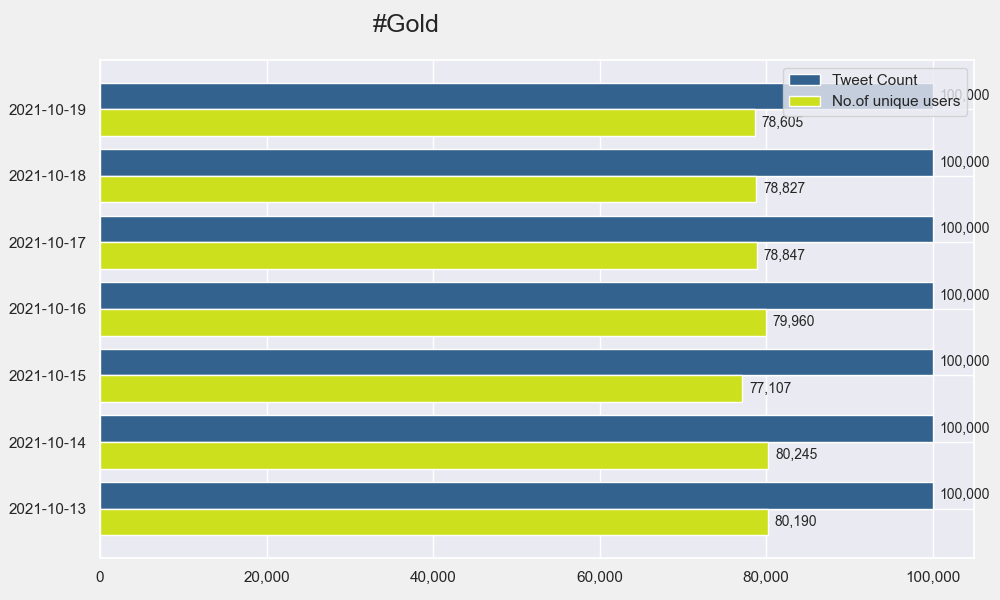

<IPython.core.display.Javascript object>


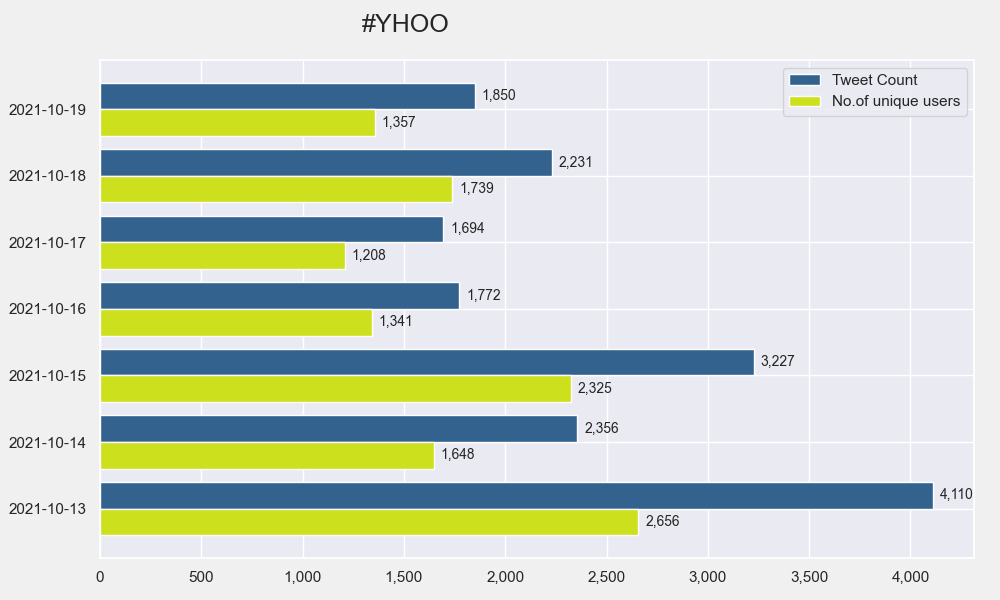

In [13]:
# To loop over each ticker and get the graphical representation of each ticker.

for i in list((ticker_grp.ticker).unique()):
    
    tweet_plt_df = ticker_grp[(ticker_grp.ticker == i)]\
                            .filter(["tweet_date", "tweet_count", "user_n"])
                               
    
    tweet_plt_df = tweet_plt_df.set_index(tweet_plt_df.columns[0])
    
    # Variables
    first_bar = tweet_plt_df['tweet_count']
    first_bar_label = 'Tweet Count'
    first_bar_color = '#32628d'
    second_bar = tweet_plt_df['user_n']
    second_bar_label = 'No.of unique users'
    second_bar_color = '#cde01d'
    labels = tweet_plt_df.index
    width = 0.4  # the width of the bars
    plot_title = '#' + i
    title_size = 18
    filename = i
    
    tweet_plt_df.sort_values(by='tweet_count', inplace=True, ascending=True)  
    
    fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
    plt.tight_layout()
    
    # Plot double bars
    y = np.arange(len(labels))  # Label locations
    ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
    ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
    
    # Format ticks
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
            
    # Set title
    title = plt.title(plot_title, pad=20, fontsize=title_size)
    title.set_position([.35, 1])
    
    # Adjust subplots
    plt.subplots_adjust(left=0.10, top=0.9)
        
    # Create labels
    rects = ax.patches
    for rect in rects:
        
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = 5
        ha = 'left'
        if x_value < 0:
            space *= -1
            ha = 'right'
        label = '{:,.0f}'.format(x_value)
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(space, 0),          
            textcoords='offset points',
            va='center',                
            ha=ha)
             
    # Set y-labels and legend
    ax.set_yticklabels(labels)
    ax.legend()
    
    # To show each y-label, not just even ones
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    
    # Saving the plots of each ticker.
    plt.savefig(filename+'.png', facecolor=(.94, .94, .94))